# SUMMARIZING IMMUNE CELLS
## Sid Gurajala
## Last Updated: 03/21/2024

In [1]:
library(parallel)
library(patchwork)
library(purrr)
library(dplyr) 
library(tidyr)
library(cowplot)
library(singlecellmethods)
library(ggplot2)
library(ggbeeswarm)
library(stringr)
library(viridis)

source("/data/srlab/anathan/scripts/scseq_utils.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘singlecellmethods’


The following object is masked from ‘package:base’:

    rowMeans


Loading required package: viridisLite



In [2]:
labelfontsize = 20
tickfontsize = 16

figdir = '../../figures/components/'

In [15]:
source("/data/srlab/ssg34/SLE_kidney_v2/scripts/libs/kidney_utils_updated.r")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: Rcpp



In [3]:
# source("/data/srlab/ssg34/SLE_kidney_v2/scripts/libs/kidney_utils.r")
clinical <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/clinical_data_05042023.rds') %>% 
                        rename(Final_Site = Site) %>% select(-sample)

# B_PLASMA

In [4]:
qcd_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/qcd/BP_clusterQCd_cellstate_meta_annotations_09232022.rds')
qcd_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/qcd/BP_clusterQCd_norm_09232022.rds')

In [4]:
sn_control <- qcd_meta %>% filter(dataset == "snRNAseq", Type == "Control") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sn_control = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sn_control)
sn_LN <- qcd_meta %>% filter(dataset == "snRNAseq", Type == "LN") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sn_LN = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sn_LN)
sc_control <- qcd_meta %>% filter(dataset == "scRNAseq", Type == "Control") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sc_control = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sc_control)
sc_LN <- qcd_meta %>% filter(dataset == "scRNAseq", Type == "LN") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sc_LN = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sc_LN)
merged <- sc_LN %>% left_join(sc_control) %>% left_join(sn_LN) %>% left_join(sn_control)
merged[is.na(merged)] <- "0 (0)"

Joining with `by = join_by(new_cluster_number)`
Joining with `by = join_by(new_cluster_number)`
Joining with `by = join_by(new_cluster_number)`


In [43]:
write.csv(merged, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/bplasma_summary_04152024.csv', quote = FALSE, row.names = FALSE)

## Fine Grain Cell Types Figure

### Single Cell UMAP, Single Nuclear UMAP

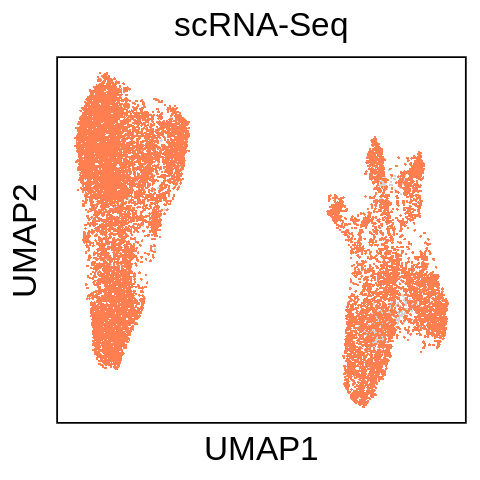

In [9]:
umap_plot = ggplot() +
  geom_point(
    data=select(qcd_meta, c(hUMAP1, hUMAP2, dataset)),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "lightgrey"
  ) + 
  geom_point(
    data=qcd_meta %>% filter(dataset == "scRNAseq") %>% select(hUMAP1, hUMAP2),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "coral"
  ) +
theme_classic(base_size = tickfontsize) +
  theme(
    legend.position = "none",
         plot.title = element_text(size = labelfontsize, hjust = 0.5),
          axis.title = element_text(size = labelfontsize), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          text=element_text(family="Arial")
  ) + labs(x = "UMAP1", y = "UMAP2", title = 'scRNA-Seq') 


outplot = umap_plot

height = 4
width = 4
fig.size(height, width)
outplot

ggsave(paste0(figdir, 'bp_umap_sc.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'bp_umap_sc.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)


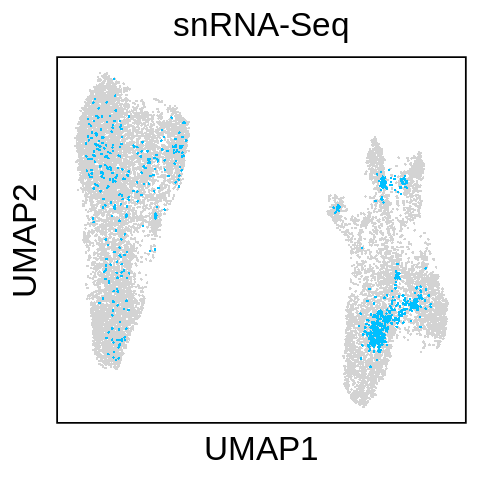

In [8]:
umap_plot = ggplot() +
  geom_point(
    data=select(qcd_meta, c(hUMAP1, hUMAP2, dataset)),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "lightgrey"
  ) + 
  geom_point(
    data=qcd_meta %>% filter(dataset == "snRNAseq") %>% select(hUMAP1, hUMAP2),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "deepskyblue"
  ) +
theme_classic(base_size = tickfontsize) +
  theme(
    legend.position = "none",
         plot.title = element_text(size = labelfontsize, hjust = 0.5),
          axis.title = element_text(size = labelfontsize), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          text=element_text(family="Arial")
  ) + labs(x = "UMAP1", y = "UMAP2", title = 'snRNA-Seq') 


outplot = umap_plot

height = 4
width = 4
fig.size(height, width)
outplot

ggsave(paste0(figdir, 'bp_umap_sn.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'bp_umap_sn.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

### Cluster UMAPs

In [5]:
qcd_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/qcd/BP_clusterQCd_cellstate_meta_annotations_09232022.rds')
final_annotation <- data.frame(new_cluster_number = seq(0, 11),
                                           final_annotation = c("B0. FOXO1+ BCL6+ GC",
                                                                "B1. CD28+ IGM- activated B Cell",
                                                                "B2. IGHD+ FCER2+ Naïve B Cell",
                                                                "B3. BCL2+ CD27+ MCL1+ Unswitched Memory B Cell",
                                                                "B4. BCL2+ BCL11A+ IGHE+ Memory B Cell",
                                                                "B5. FCRL5+ ITGAX+ TBX21+ ABC-like", 
                                                                "P6. CD38++ MKI67+ Plasmablast",
                                                                "P7. IGG+ IGKC++ IGL- Plasma Cell",
                                                                "P8. IGA+ IGL- Plasma Cell",
                                                                "P9. IGG+ IGKC+ IGL- Plasma Cell",
                                                                "P10. IGA+ IGL+ Plasma Cell",
                                                                "P11. IGG+ IGKC- IGL+ Plasma Cell"))

qcd_meta <- qcd_meta %>% left_join(final_annotation)

Joining with `by = join_by(new_cluster_number, final_annotation)`


In [6]:
percent_mito <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/percent_mito_from_rawcounts_12072023.rds')
qcd_meta <- qcd_meta %>% select(-annotation) %>% left_join(percent_mito)
# saveRDS(qcd_meta, '/data/srlab/ssg34/SLE_kidney_v2/data/qcd/BP_clusterQCd_cellstate_meta_annotations_09232022.rds')

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `annotation` doesn't exist.


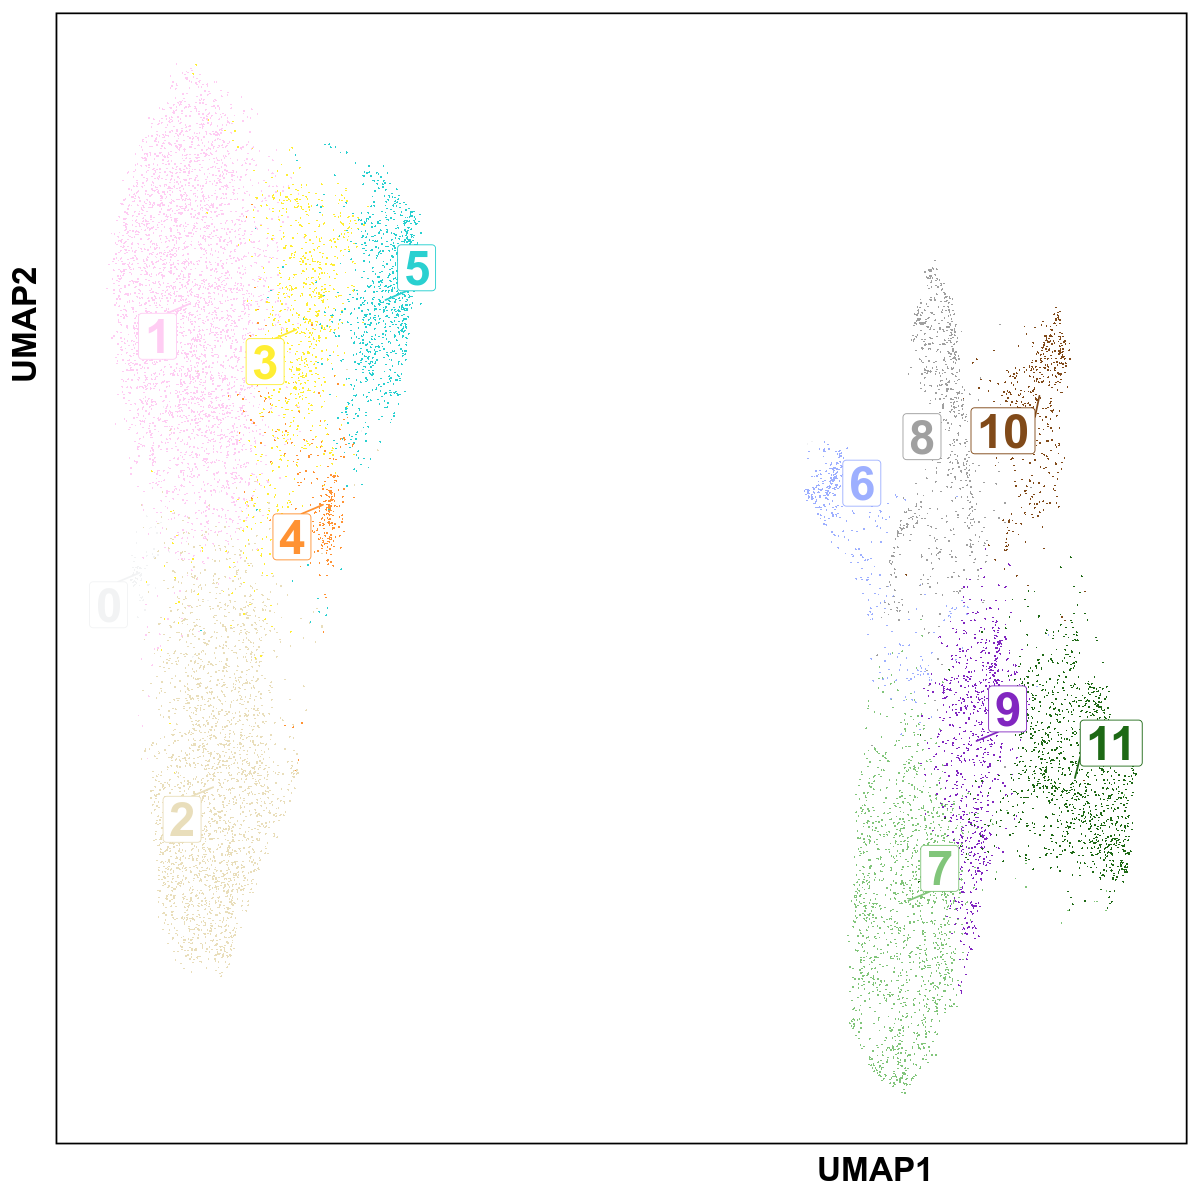

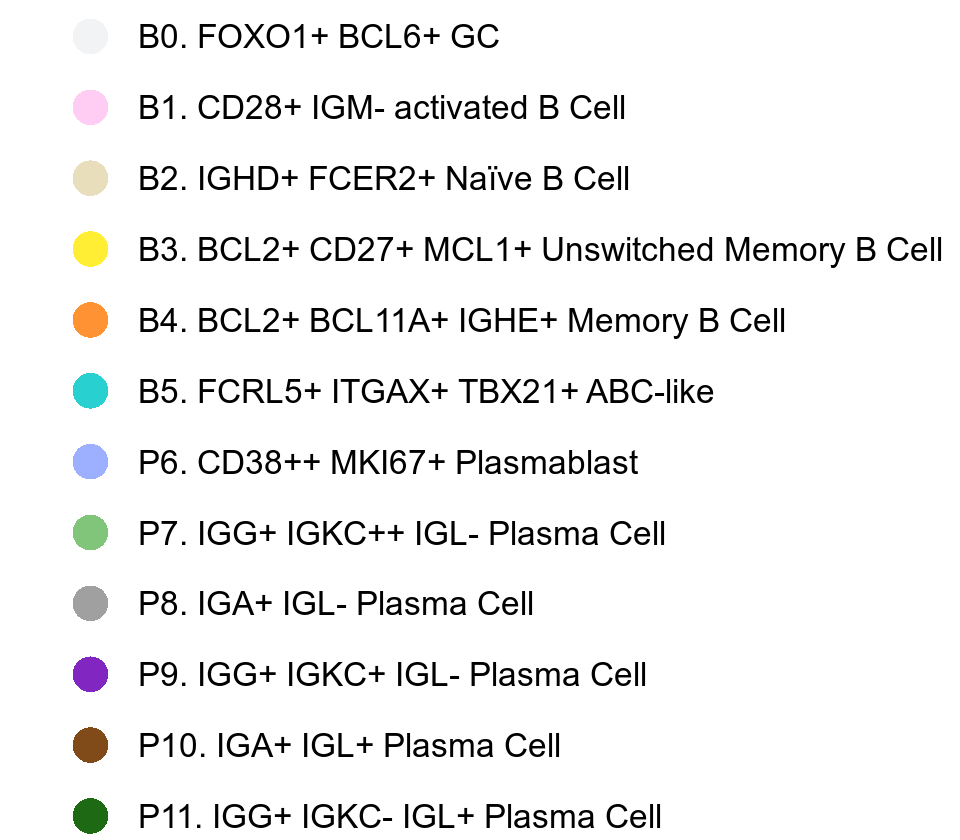

In [ ]:
options(warn=-1)

cluster_center <- qcd_meta %>%
                  group_by(new_cluster_number, final_annotation) %>%
                  summarise_at(vars(hUMAP1, hUMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

p <- ggplot() +
      geom_point(
        data = qcd_meta[sample(nrow(qcd_meta)), ] %>% 
          select(hUMAP1, hUMAP2, new_cluster_number, final_annotation) %>% 
                  mutate(final_annotation = factor(final_annotation, 
                                                   levels = cluster_center$final_annotation)),
        aes(x = hUMAP1, y = hUMAP2, color = final_annotation),
          size = 0.75, shape = 20, stroke = 0.0001) +
      ggrepel::geom_label_repel(
        data = cluster_center,
        aes(x = hUMAP1, y = hUMAP2, 
            label = new_cluster_number, color = as.factor(final_annotation)),
        size = 10,  fontface = "bold",
        box.padding = unit(0.5, "lines"),
        point.padding = unit(0.01, "lines"),
        show.legend = FALSE
      ) +
    scale_color_manual(values = rev(as.vector(watlington(16)))) +
    theme_classic(base_size = 15) +
      theme(
        legend.position = "right",
            #  plot.title = element_text(hjust = 0.5, 
            #                            size = 18, 
            #                            face = "bold"),
              axis.title = element_text(hjust = 0.75, 
                                        size = 20, 
                                        face = "bold"), 
              axis.text = element_blank(),
              axis.line = element_blank(),
              axis.ticks = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1),
              legend.text = element_text(size = 20),
              legend.title = element_blank()
          
    ) +
    theme(text=element_text(family="Arial")) + 
        labs(x = "UMAP1", y = "UMAP2") +
        guides(color = guide_legend(ncol = 1, override.aes = list(size = 15)))
legend <- cowplot::get_legend(p)
p <- p + theme(legend.position = "none")
legend <- cowplot::plot_grid(legend)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/figure2/figure2b.png",
       p,
       base_height = 10,
       base_width = 10)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/figure2/figure2b-legend.png",
       legend,
       base_height = 7,
       base_width = 7)
fig.size(10, 10)
p
fig.size(7, 8)
legend
options(warn=0)

### Marker Gene UMAPs

In [10]:
markers = c('MS4A1', 'SDC1', 'IGHM', 'IGHG1')

In [11]:
qcd_scaled = qcd_norm[markers, ] %>% scaleData
vmax = qcd_scaled %>% quantile(.95)
vmin = qcd_scaled %>% quantile(.05)

In [16]:
p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[1], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p1 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[2], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p2 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[3], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p3 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[4], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p4 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

umap_legend = get_legend(p +theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
                theme(text=element_text(family="Arial"))))
umap_legend = cowplot::plot_grid(umap_legend) 

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


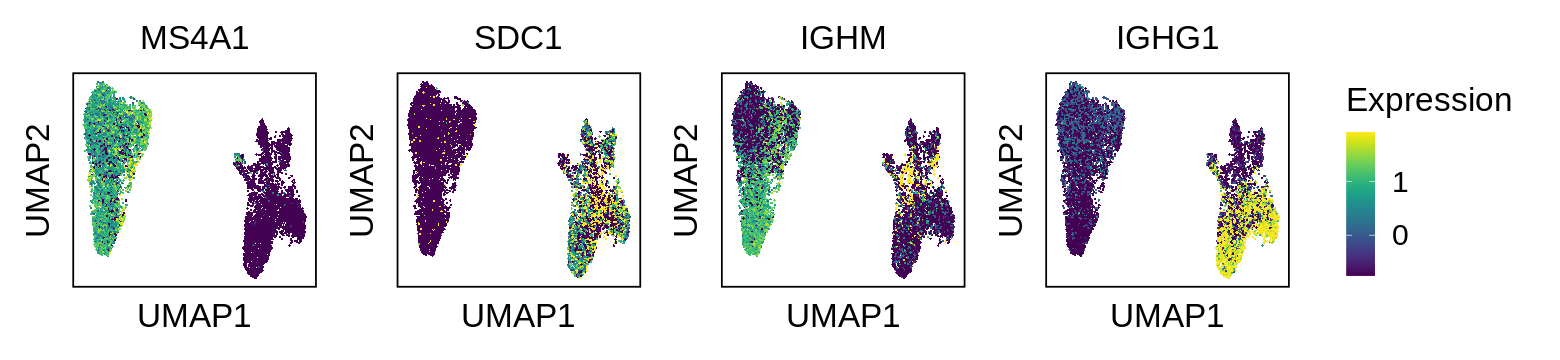

In [18]:
height = 3
width = 13
fig.size(height, width)

outplot = p1 + p2 + p3 + p4 + umap_legend + plot_layout(nrow = 1)
outplot

ggsave(paste0(figdir, 'bp_umap_markers.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'bp_umap_markers.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

### Gene heatmaps

In [10]:
qcd_meta <- left_join(qcd_meta, data.frame(new_cluster_number = seq(0, 11),
                                           final_annotation = c("B0. MME+ BCL6+ GC-like",
                                                                "B1. CD52+ TMSB4X+ IGM- B Cell",
                                                                "B2. IGHD+ FCER2+ Naïve B Cell",
                                                                "B3. CD24+ IGM+ Memory B Cell",
                                                                "B4. IGEhigh BCL11A+ B Cell",
                                                                "B5. ITGAX+ TBX21+ ABC", 
                                                                "P6. CD38++ MKI67+ Plasmablast",
                                                                "P7. IGG+ IGKC++ IGL- Plasma Cell",
                                                                "P8. IGA+ IGL- Plasma Cell",
                                                                "P9. IGG+ IGKC+ IGL- Plasma Cell",
                                                                "P10. IGA+ IGL+ Plasma Cell",
                                                                "P11. IGG+ IGKC- IGL+ Plasma Cell")))

Joining with `by = join_by(new_cluster_number, final_annotation)`


In [12]:
qcd_meta$final_annotation %>% unique %>% sort

[1] "B0. FOXO1+ BCL6+ GC"                           
 [2] "B1. Switched B Cell"                           
 [3] "B2. IGHD+ FCER2+ Naïve B Cell"                 
 [4] "B3. BCL2+ CD27+ MCL1+ Unswitched Memory B Cell"
 [5] "B4. BCL2+ BCL11A+ Switched Memory B Cell"      
 [6] "B5. FCRL5+ ITGAX+ TBX21+ ABC-like"             
 [7] "P10. IGA+ IGL+ Plasma Cell"                    
 [8] "P11. IGG+ IGKC- IGL+ Plasma Cell"              
 [9] "P6. CD38++ MKI67+ Plasmablast"                 
[10] "P7. IGG+ IGKC++ IGL- Plasma Cell"              
[11] "P8. IGA+ IGL- Plasma Cell"                     
[12] "P9. IGG+ IGKC+ IGL- Plasma Cell"

In [15]:
names(tissue_names)

[1] "NK0. CD56dim NK"                                 
 [2] "NK3. CD56bright NK"                              
 [3] "T1. CD8+ GZMBhigh GZMHhigh CTL"                  
 [4] "T10. GZMK+ CD8+ ITGAE+ ITGA1+"                   
 [5] "T11. CD4+ Effector Memory"                       
 [6] "T12. CD8+ GMZK+ CD69+"                           
 [7] "T13. CD4+ JUNlow Resident Memory"                
 [8] "T14. CD4+ JUNhigh Resident Memory"               
 [9] "T15. CD4+ S1PR1+ Central memory/Naive"           
[10] "T16. KLRB1+ KIT+ ILC"                            
[11] "T17. CD4+ RORC+ CCR6+ Th17"                      
[12] "T18. CD4+ Central Memory/Naive"                  
[13] "T19. CD4+ IL2RA++ FOXP3++ Treg"                  
[14] "T2. CD8+ GZMBlow GZMHhigh CTL"                   
[15] "T20. CD4+ FOXP3+ CXCR5+ Central Memory/Naive"    
[16] "T21. CD4+ PDCD1+ CXCR5+ TFH/TPH"                 
[17] "T4. CENPF+ MKI67+ Proliferating"                 
[18] "T5. GZMK+ CD8+ CCL5high"                         
[19] "T6. GZMK+ CD8+ CCL5low"                          
[20] "T7. GZMK+ CD8+ Effector Memory"                  
[21] "T8. GZMK+ CD8+ NEAT1+"                           
[22] "T9. GZMK+ CD8+ Resident Memory"                  
[23] "B0. FOXO1+ BCL6+ GC"                             
[24] "B1. CD28+ IGM- activated B Cell"                 
[25] "B2. IGHD+ FCER2+ Naïve B Cell"                   
[26] "B3. BCL2+ CD27+ MCL1+ Unswitched Memory B Cell"  
[27] "B4. BCL2+ BCL11A+ IGHE+ Memory B Cell"           
[28] "B5. FCRL5+ ITGAX+ TBX21+ ABC-like"               
[29] "P6. IGG+ Plasma Cell"                            
[30] "P7. IGA+ Plasma Cell"                            
[31] "P8. CD38++ MKI67+ Plasmablast"                   
[32] "M0. CD16+ CXC3CR1+ Monocyte"                     
[33] "M1. CD14+ CD16+ CCL2+ CX3CR1+ Monocyte"          
[34] "M2. CD14+ CCR2+ Monocyte"                        
[35] "M3. CCL2+ CCL3+ Monocyte"                        
[36] "M4. TPSB2+ MAST cell"                            
[37] "M5. GPNMBhigh NUPR1high Macrophage"              
[38] "M6. SELENOPinter ISGhigh Macrophage"             
[39] "M7. SPP1high FABP5high Macrophage"               
[40] "M8. SPP1low FABP5high Macrophage"                
[41] "M9. MERTKhigh FABP5high Macrophage"              
[42] "M10. SELENOPinter LYVE1inter Resident Macrophage"
[43] "M11. GPMNBhigh NUPR1low Macrophage"              
[44] "M12. SELENOPhigh LYVE1high Resident Macrophage"  
[45] "DC13. CCR7+ LAMP3+ DC2"                          
[46] "M14. APOChigh C3high Macrophage"                 
[47] "DC15. CLEC10Alow cDC2"                           
[48] "M16. APOClow C3high Macrophage"                  
[49] "DC17. CLEC10Ahigh cDC2"                          
[50] "M18. CENPF+ MKI67+ Proliferating"                
[51] "DC19. cDC1"                                      
[52] "DC20. pDC"                                       
[53] "PT0. Late Injuryhigh"                            
[54] "PT1. SLC7A7high ALBhigh S1/S2"                   
[55] "PT2. Low Quality"                                
[56] "PT3. PCK1high DXCRhigh S2/S3"                    
[57] "PT4. ANPEPhigh APOMhigh S1/S2"                   
[58] "PT5. Late Injurylow S1/S2"                       
[59] "PT6. PKHD1high SLC3A1high S2/S3"                 
[60] "PT7. DTL"

In [44]:
qcd_meta$final_annotation %>% unique %>% sort

[1] "B0. FOXO1+ BCL6+ GC"                           
 [2] "B1. CD28+ IGM- activated B Cell"               
 [3] "B2. IGHD+ FCER2+ Naïve B Cell"                 
 [4] "B3. BCL2+ CD27+ MCL1+ Unswitched Memory B Cell"
 [5] "B4. BCL2+ BCL11A+ IGHE+ Memory B Cell"         
 [6] "B5. FCRL5+ ITGAX+ TBX21+ ABC-like"             
 [7] "P10. IGA+ IGL+ Plasma Cell"                    
 [8] "P11. IGG+ IGKC- IGL+ Plasma Cell"              
 [9] "P6. CD38++ MKI67+ Plasmablast"                 
[10] "P7. IGG+ IGKC++ IGL- Plasma Cell"              
[11] "P8. IGA+ IGL- Plasma Cell"                     
[12] "P9. IGG+ IGKC+ IGL- Plasma Cell"

In [16]:
annotation.order = c('B0. FOXO1+ BCL6+ GC',
                     'B1. CD28+ IGM- activated B Cell',
                     'B2. IGHD+ FCER2+ Naïve B Cell',
                     'B3. BCL2+ CD27+ MCL1+ Unswitched Memory B Cell',
                     'B4. BCL2+ BCL11A+ IGHE+ Memory B Cell',
                     'B5. FCRL5+ ITGAX+ TBX21+ ABC-like',
                     'P10. IGA+ IGL+ Plasma Cell',
                     'P11. IGG+ IGKC- IGL+ Plasma Cell',
                     'P6. CD38++ MKI67+ Plasmablast',
                     'P7. IGG+ IGKC++ IGL- Plasma Cell',
                     'P8. IGA+ IGL- Plasma Cell',
                     'P9. IGG+ IGKC+ IGL- Plasma Cell'
                     
                    # "B0. MME+ BCL6+ GC-like",
                    # "B1. CD52+ TMSB4X+ IGM- B Cell",
                    # "B2. IGHD+ FCER2+ Naïve B Cell",
                    # "B3. CD24+ IGM+ Memory B Cell",
                    # "B4. IGEhigh BCL11A+ B Cell",
                    # "B5. ITGAX+ TBX21+ ABC", 
                    # "P6. CD38++ MKI67+ Plasmablast",
                    # "P7. IGG+ IGKC++ IGL- Plasma Cell",
                    # "P8. IGA+ IGL- Plasma Cell",
                    # "P9. IGG+ IGKC+ IGL- Plasma Cell",
                    # "P10. IGA+ IGL+ Plasma Cell",
                    # "P11. IGG+ IGKC- IGL+ Plasma Cell"
                    )

In [11]:
library(googlesheets4)
gs4_deauth()

tissue_names = read_sheet("https://docs.google.com/spreadsheets/d/1f94hwyuDMvSUQyelWM89xfhDos7izNQw9bQ4amml2OQ/edit?usp=sharing", 
                 sheet = "Tissue")
tissue_names = setNames(tissue_names$Annotation_latest, tissue_names$Annotation_v1)
qcd_meta = qcd_meta %>% mutate(final_annotation = recode(final_annotation, !!!tissue_names))

annotation.order = recode(annotation.order, !!!tissue_names)

In [20]:
# annotation.order = c("B0. MME+ BCL6+ GC-like",
#                                                                 "B1. CD52+ TMSB4X+ IGM- B Cell",
#                                                                 "B2. IGHD+ FCER2+ Naïve B Cell",
#                                                                 "B3. CD24+ IGM+ Memory B Cell",
#                                                                 "B4. IGEhigh BCL11A+ B Cell",
#                                                                 "B5. ITGAX+ TBX21+ ABC", 
#                                                                 "P6. CD38++ MKI67+ Plasmablast",
#                                                                 "P7. IGG+ IGKC++ IGL- Plasma Cell",
#                                                                 "P8. IGA+ IGL- Plasma Cell",
#                                                                 "P9. IGG+ IGKC+ IGL- Plasma Cell",
#                                                                 "P10. IGA+ IGL+ Plasma Cell",
#                                                                 "P11. IGG+ IGKC- IGL+ Plasma Cell")

# marker_genes <- c("MS4A1", "SDC1", "MME", "BCL6", "CD27", "CD52", "TMSB4X", "IGHM", "IGHD", "FCER2", 
#                   "IGHE", "BCL11A", "CD38", "MKI67", "IGHA1", "IGHG1", "IGKC", "IGLC2")

# marker_genes <- c("MS4A1", , "MME", "BCL6", "CD27", "CD52", "TMSB4X", "IGHM", "IGHD", "FCER2", 
#                   "IGHE", "BCL11A", "CD38", "MKI67", "IGHA1", "IGHG1",  "IGLC2", "SDC1")

In [33]:
marker.genes <- c("MS4A1", "SDC1", "MME", "BCL6", "CD52",
                  "TMSB4X", "FCER2", "CD24",  "IGHM", "IGHD", 
                  "IGHE", "BCL11A", "CD38", "MKI67", "IGHA1", "IGHG1", "IGLC2", "TNFRSF17")

In [32]:
'TNFRSF17' %in% (qcd_norm %>% rownames)

[1] TRUE

In [34]:
marker_genes = marker.genes

In [23]:
library(presto)

Loading required package: Rcpp



In [35]:
wilcox_sn <- wilcoxauc(qcd_norm[, qcd_meta %>% filter(dataset == 'snRNAseq') %>% pull(cell)], 
                       qcd_meta %>% filter(dataset == 'snRNAseq') %>% pull(final_annotation))
wilcox_sc <- wilcoxauc(qcd_norm[, qcd_meta %>% filter(dataset == 'scRNAseq') %>% pull(cell)], 
                       qcd_meta %>% filter(dataset == 'scRNAseq') %>% pull(final_annotation))

In [36]:
sc_plot_df <- wilcox_sc %>%  filter(feature %in% marker_genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 
sn_plot_df <- wilcox_sn %>%  filter(feature %in% marker_genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 

In [81]:
setdiff(sc_plot_df$group, annotation.order)

character(0)

In [37]:
title = 'scRNA-seq'
dat_all = sc_plot_df %>% rename(percent = pct_in, zscore = avgExpr_scaled) 

dat = dat_all %>% pivot_wider(id_cols = 'feature', names_from = 'group', 
                    values_from = 'zscore') %>% as.data.frame
rownames(dat) = dat$feature
dat = dat %>% select(-feature)
row.order = marker_genes
col.order = annotation.order
# row.order = rownames(dat)[hclust(dist(dat))$order]
# col.order = colnames(dat)[hclust(dist(t(dat)))$order]
dat = dat_all
dat$group = factor(dat$group, levels = col.order)
dat$feature = factor(dat$feature, levels = row.order)

# dat = dat[!is.na(dat$group), ]

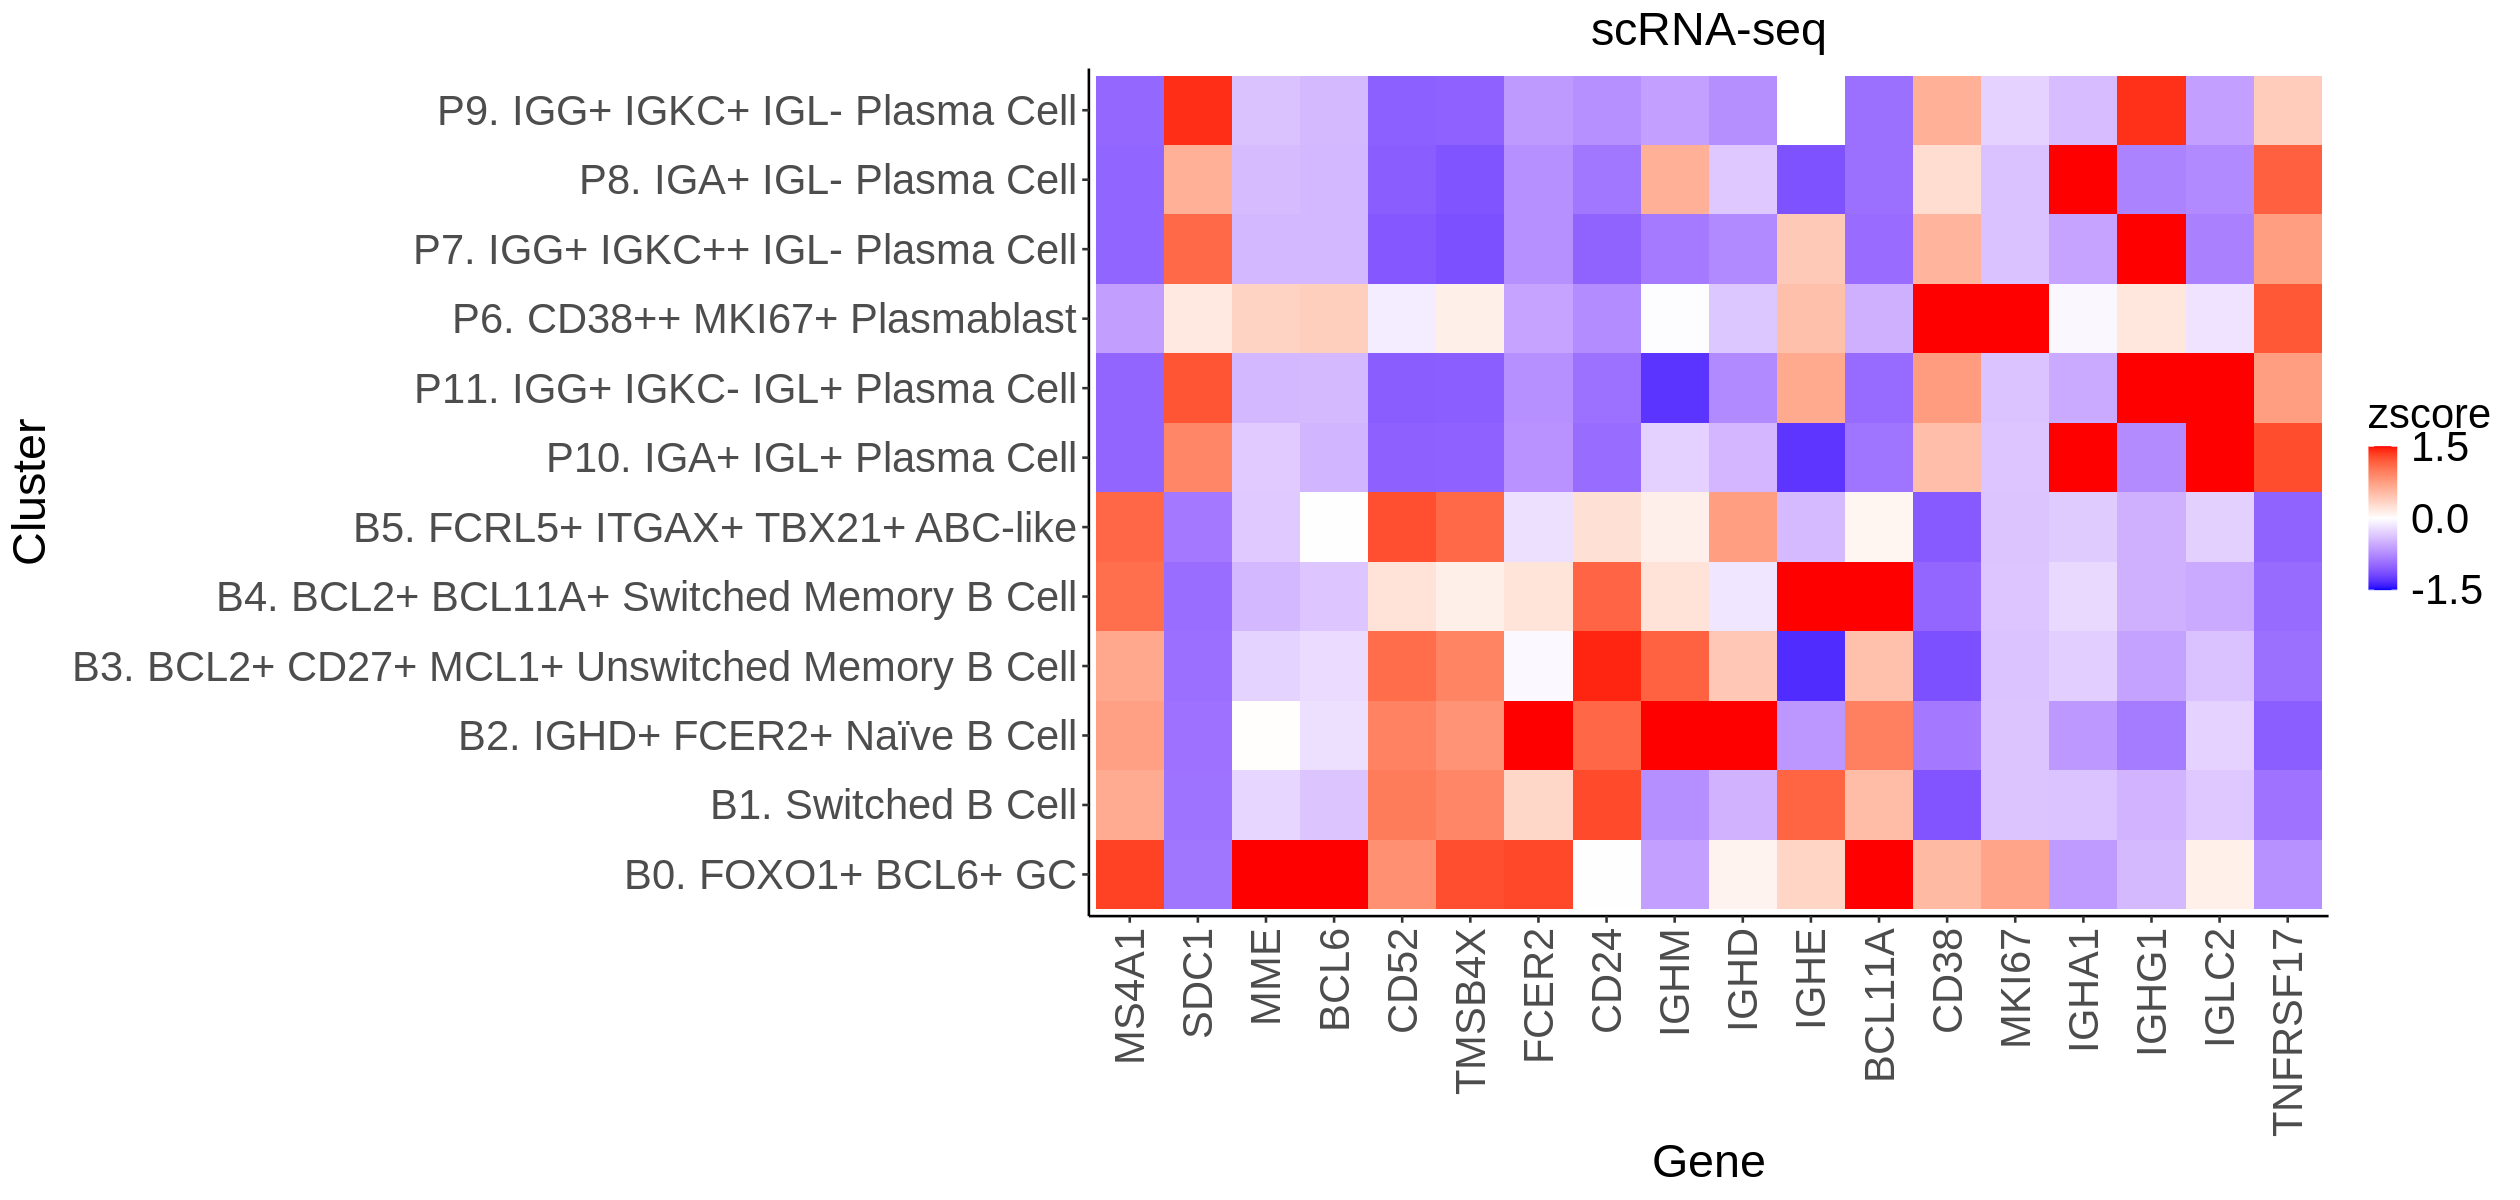

In [39]:
height = 10
width = 21
fig.size(height, width)


marker_heatmap = ggplot(dat, 
               aes(x = feature, y = group, 
                   fill = zscore)) + 
    geom_tile() + 
    theme_classic(base_size = tickfontsize) + 
    scale_fill_gradient2(low = "blue",
                         mid = "white",
                         high= "red", 
                         limits=c(-1.5, 1.5), 
                         oob = scales::squish, breaks = c(-1.5, 0, 1.5)) + 
    # scale_x_discrete(limits = marker_genes) + 
    # scale_y_discrete(limits = final_annotation$final_annotation) + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
          axis.text = element_text( size = labelfontsize+5),
          axis.title = element_text(size = labelfontsize+8), 
          plot.title = element_text(size = labelfontsize+8, hjust = 0.5), 
          legend.text = element_text(size = labelfontsize+5),
          legend.title = element_text(size = labelfontsize+5)

         ) + 
    labs(x = "Gene", y = "Cluster", title = title)

outplot = marker_heatmap
outplot

ggsave(paste0(figdir, 'bp_sc_heatmap_markers.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'bp_sc_heatmap_markers.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

In [40]:
title = 'snRNA-seq'
dat_all = sn_plot_df %>% rename(percent = pct_in, zscore = avgExpr_scaled) 

# dat = dat_all %>% pivot_wider(id_cols = 'feature', names_from = 'group', 
#                     values_from = 'zscore') %>% as.data.frame
# rownames(dat) = dat$feature
# dat = dat %>% select(-feature)
# row.order = rownames(dat)[hclust(dist(dat))$order]
# col.order = colnames(dat)[hclust(dist(t(dat)))$order]
dat = dat_all
dat$group = factor(dat$group, levels = col.order)
dat$feature = factor(dat$feature, levels = row.order)
# dat = dat[!is.na(dat$group), ]

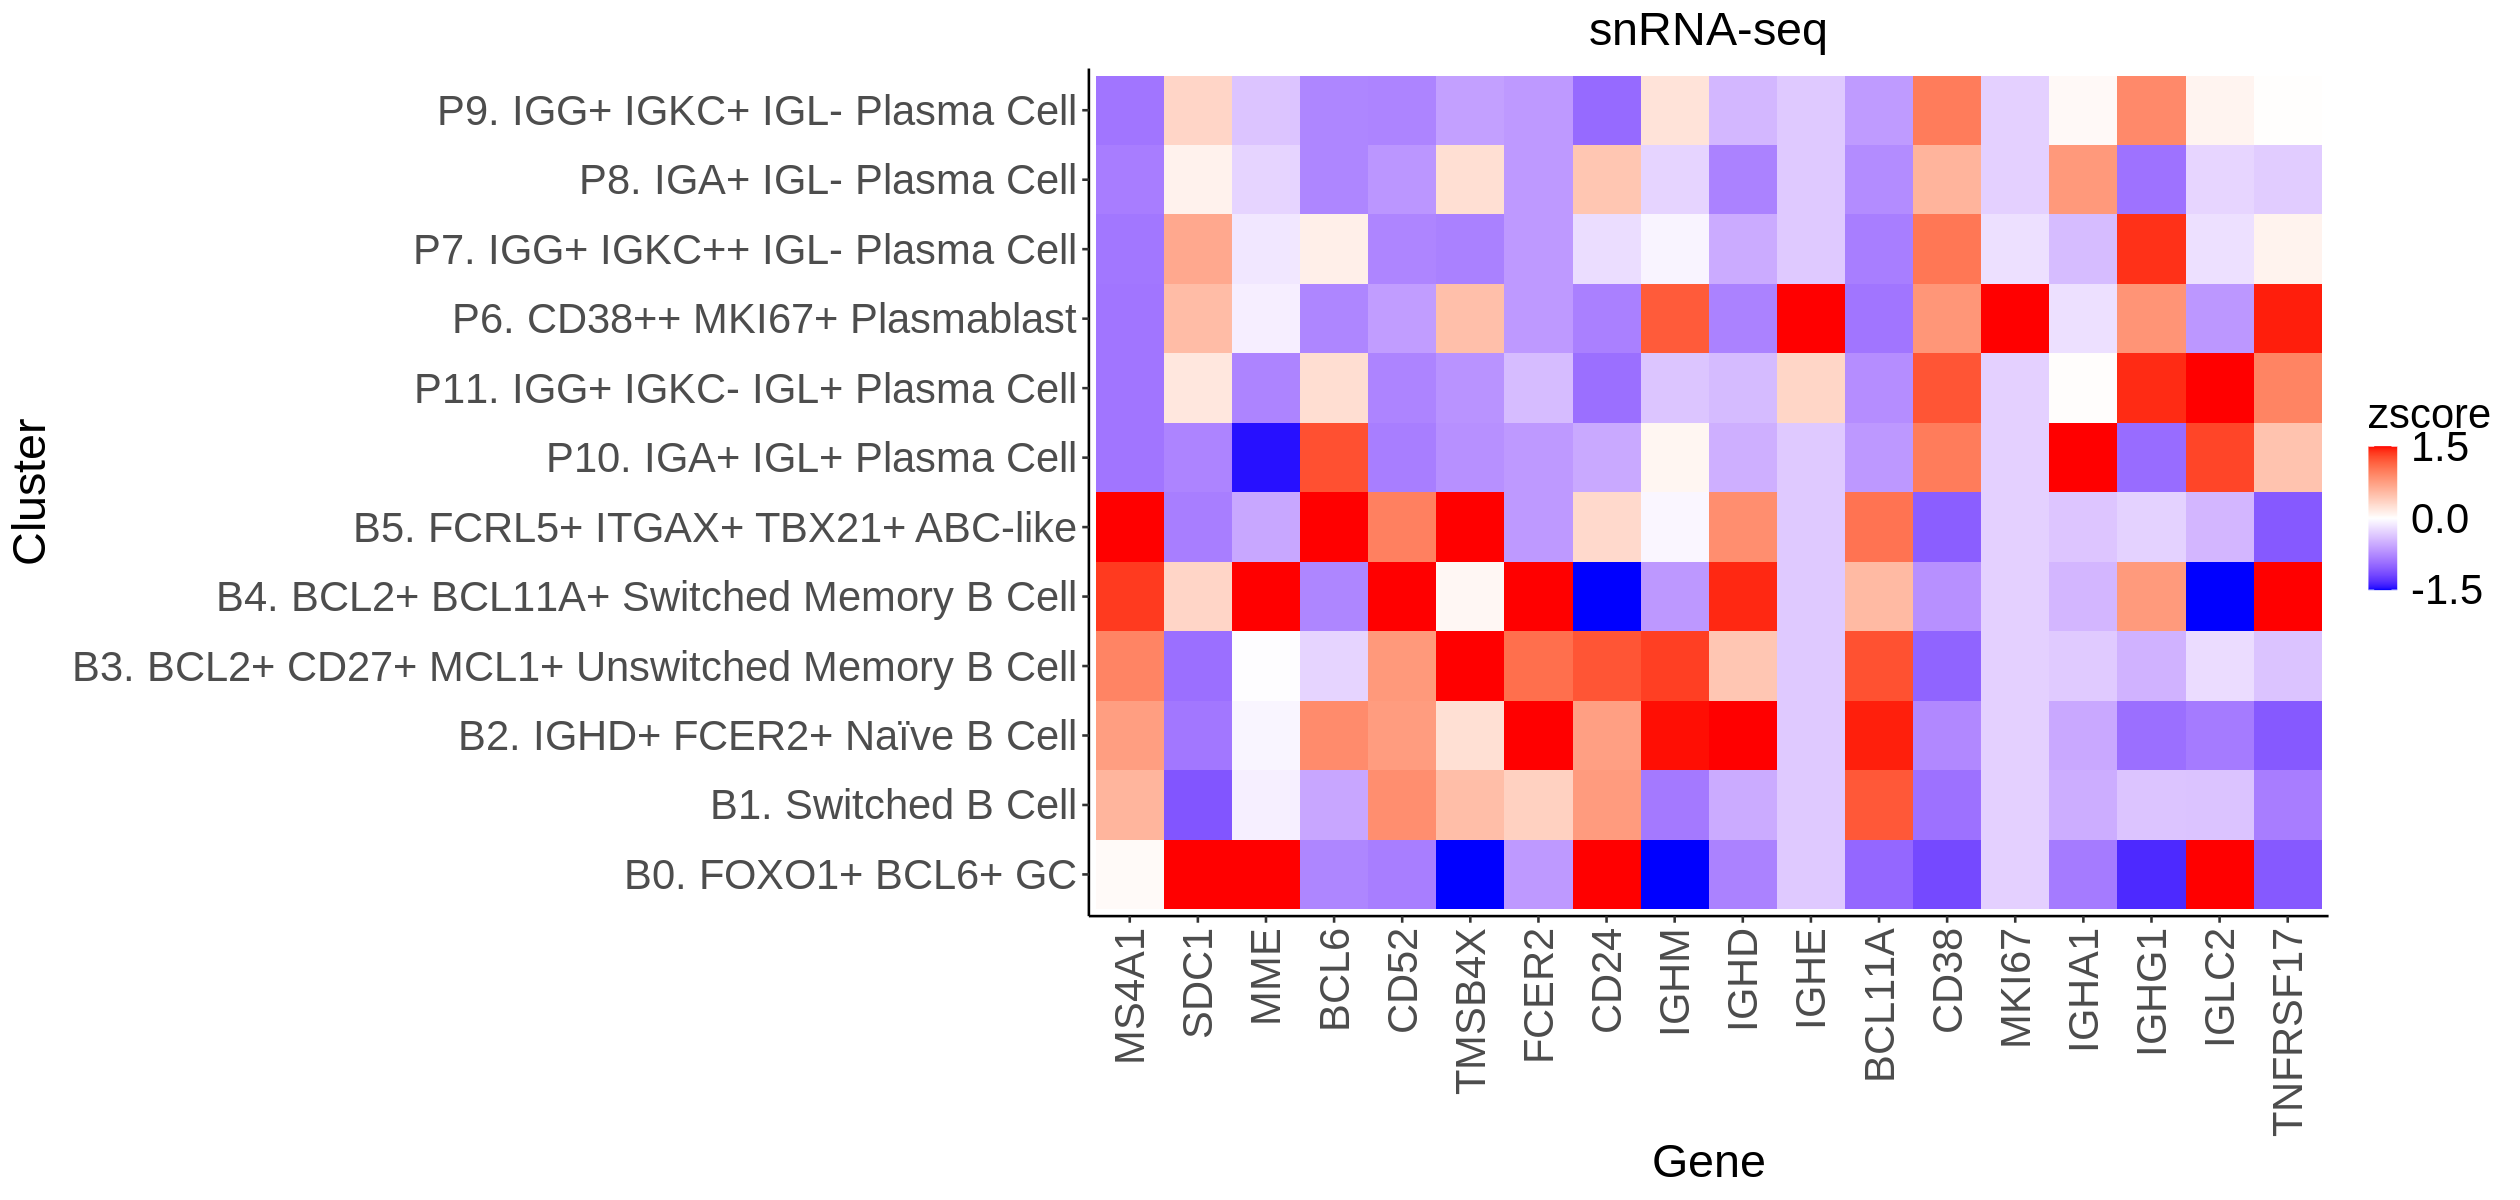

In [41]:
height = 10
width = 21
fig.size(height, width)


marker_heatmap = ggplot(dat, 
               aes(x = feature, y = group, 
                   fill = zscore)) + 
    geom_tile() + 
    theme_classic(base_size = tickfontsize) + 
    scale_fill_gradient2(low = "blue",
                         mid = "white",
                         high= "red", 
                         limits=c(-1.5, 1.5), 
                         oob = scales::squish, breaks = c(-1.5, 0, 1.5)) + 
    # scale_x_discrete(limits = marker_genes) + 
    # scale_y_discrete(limits = final_annotation$final_annotation) + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
          axis.text = element_text( size = labelfontsize+5),
          axis.title = element_text(size = labelfontsize+8), 
          plot.title = element_text(size = labelfontsize+8, hjust = 0.5), 
          legend.text = element_text(size = labelfontsize+5),
          legend.title = element_text(size = labelfontsize+5)

         ) + 
    labs(x = "Gene", y = "Cluster", title = title)

outplot = marker_heatmap
outplot

ggsave(paste0(figdir, 'bp_sn_heatmap_markers.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'bp_sn_heatmap_markers.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

### Cluster Proportions in Matched Patients

In [58]:
qcd_meta <- qcd_meta  %>% 
                mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% 
                mutate(individual = unlist(individual)[3]) 

In [59]:
sample_freq <- qcd_meta %>% select(dataset, individual, new_cluster_number) %>% 
                    table() %>% data.frame() %>% 
                    pivot_wider(names_from = "new_cluster_number", values_from = Freq) 

In [60]:
ind_list <- qcd_meta %>% select(dataset, individual) %>% 
                table() %>% data.frame() %>% 
                pivot_wider(names_from = 'dataset', values_from = "Freq") %>% filter(scRNAseq > 15 & snRNAseq > 15) %>% 
                pull(individual)

In [61]:
sample_freq_sc <- sample_freq %>% 
                    filter(individual %in% ind_list) %>% 
                    select(- individual) %>% 
                    filter(dataset == "scRNAseq") %>% 
                    select(-dataset) %>% colSums()

sample_freq_sn <- sample_freq %>% 
                    filter(individual %in% ind_list) %>% 
                    select(- individual) %>% 
                    filter(dataset == "snRNAseq") %>% 
                    select(-dataset) %>% colSums()

In [62]:
sample_freq <- data.frame(rep("a", 12))
sample_freq$sc_freq <- sample_freq_sc / sum(sample_freq_sc)
sample_freq$sc_se <- sqrt((sample_freq$sc_freq * (1 - sample_freq$sc_freq)) / sample_freq_sc)
sample_freq$sn_freq <- sample_freq_sn / sum(sample_freq_sn)
sample_freq$sn_se <- sqrt((sample_freq$sn_freq * (1 - sample_freq$sn_freq)) / sample_freq_sn)
sample_freq <- sample_freq[,- 1]
sample_freq$new_cluster_number <- as.character(seq(0, 11))

In [73]:
sample_freq

sc_freq,sc_se,sn_freq,sn_se,new_cluster_number
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.02022654,0.01990850,0.004761905,0.03974598,0
0.31391586,0.01665960,0.157142857,0.03657688,1
0.16545307,0.01837389,0.084126984,0.03812829,2
0.06027508,0.01949737,0.060317460,0.03862071,3
0.02346278,0.01987560,0.012698413,0.03958719,4
0.05137540,0.01958948,0.055555556,0.03871845,5
0.04004854,0.01970609,0.017460317,0.03949160,6
0.12580906,0.01880524,0.287301587,0.03363432,7
0.04652104,0.01963954,0.055555556,0.03871845,8


In [64]:
r = cor(sample_freq$sc_freq, sample_freq$sn_freq)
pval = cor.test(sample_freq$sc_freq, sample_freq$sn_freq)$p.value

In [65]:
format(pval, format = 'e', digits = 3)

[1] "0.0513"

In [66]:
title = 'B/Plasma'

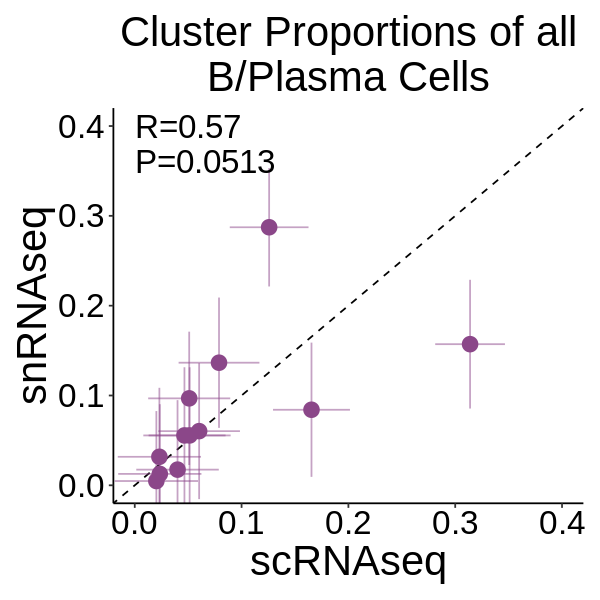

In [79]:
max_val <- max(sample_freq[, c("sc_freq", "sn_freq")])

p = ggplot(sample_freq, aes(x = sc_freq, y = sn_freq)) + 
    geom_abline(linetype = "dashed") +
    # scale_color_manual(values =as.vector(rev(palette36.colors(26)))) +
    theme_classic() + 
    geom_linerange(aes(ymax = sn_freq+1.96*sn_se, 
                        ymin = sn_freq-1.96*sn_se), alpha = 0.5, color = 'orchid4') +
    geom_linerange(aes(xmax = sc_freq+1.96*sc_se, 
                        xmin = sc_freq-1.96*sc_se), alpha = 0.5, color = 'orchid4') +
    geom_point(size = 4, color = 'orchid4') + 
    theme(legend.position = "none",
          axis.text = element_text(size = 15),
          axis.title = element_text(size = 18)) +
    coord_cartesian(xlim = c(0, 0.4), ylim = c(0, 0.4)) + 
    labs(x = "scRNAseq",
         y = "snRNAseq", title = paste0('Cluster Proportions of all\n', title, ' Cells'))+
    annotate("text", x = 0, y = 0.4, label = paste0('R=', round(r, 2)), hjust =0, 
         size =7)+
    annotate("text", x = 0, y = 0.36, label = paste0('P=', 
             format(pval, format = 'e', digits = 3)), hjust =0, 
         size =7)

p = p +theme(axis.text = element_text(color = "black", size = labelfontsize, vjust = 0.5),
           axis.title = element_text(size=labelfontsize+5, hjust = 0.5),
            legend.text = element_text(size = labelfontsize),
            legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize+5),
                theme(text=element_text(family="Arial")),
                                    plot.margin = margin(10, 10, 10, 10))
height = 5
width = 5
fig.size(height, width)

outplot = p
outplot

ggsave(paste0(figdir, 'bp_scsn_cellfreqcorr.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'bp_scsn_cellfreqcorr.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

In [80]:
cor.test(sample_freq$sc_freq, sample_freq$sn_freq)


	Pearson's product-moment correlation

data:  sample_freq$sc_freq and sample_freq$sn_freq
t = 2.213, df = 10, p-value = 0.0513
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0008135199  0.8632162556
sample estimates:
      cor 
0.5733558 


### sc/sn qq ratio

In [10]:
#find individual from sample
qcd_meta <- qcd_meta %>% 
                        mutate(individual = str_split(sample, '_')) %>% 
                        rowwise() %>% 
                        mutate(individual = unlist(individual)[3])
#filter for individuals with > X cells 
ind_meta <- qcd_meta %>% 
                    select(individual, dataset) %>% 
                    table() %>% data.frame() 

ind_keep <- vector() 

for (i in unique(ind_meta$individual)) {
    ind_subset <- ind_meta %>% filter(individual == i)
        if (all(ind_subset$Freq > 10)) {
            ind_keep <- c(ind_keep, i)
        }
}

#pseudobulking
qq_pb_sc <- data.frame(nrow = nrow(qcd_norm))
individuals_sc <- vector()

for (i in ind_keep) {
            subset <- qcd_meta %>% filter(individual == i, 
                                                 dataset == "scRNAseq") %>% 
                        pull(cell)
            pb_vec <- rowMeans(qcd_norm[, subset])
            qq_pb_sc <- cbind(qq_pb_sc, pb_vec)
            individuals_sc <- c(individuals_sc, i)
}

qq_pb_sn <- data.frame(nrow = nrow(qcd_norm))
individuals_sn <- vector()

for (i in ind_keep) {
    subset <- qcd_meta %>% filter(individual == i, 
                                                 dataset == "snRNAseq") %>% 
                        pull(cell)
            pb_vec <- rowMeans(qcd_norm[, subset])
            qq_pb_sn <- cbind(qq_pb_sn, pb_vec)
            individuals_sn <- c(individuals_sn, i)
}

#remove extraneous first column
qq_pb_sc <- qq_pb_sc[, -1]
qq_pb_sn <- qq_pb_sn[, -1]

#assign column names
colnames(qq_pb_sc) <- paste0(individuals_sc, "_sc")
colnames(qq_pb_sn) <- paste0(individuals_sn, "_sn")
qq_pb <- cbind(qq_pb_sc, qq_pb_sn)

#qqnormalization 
index_to_mean <- function(my_index, my_mean){
  return(my_mean[my_index])
}
df_rank <- apply(qq_pb,2,rank,ties.method="first")
df_sort <- data.frame(apply(qq_pb, 2, sort))
df_mean <- apply(df_sort, 1, mean)
df_final <- apply(df_rank, 2, index_to_mean, my_mean=df_mean)

#transpose to df
df_final <- t(df_final) %>% data.frame()

#assign covariates from rownames
df_final <- df_final %>% mutate(ind = sapply(rownames(df_final), 
                                             FUN = function(x) unlist(str_split(x, "_"))[1]),
                                technology = sapply(rownames(df_final), 
                                                    FUN = function(x) unlist(str_split(x, "_"))[2]))

#run pb linear model
out_bp <- data.frame()
for (i in 1:nrow(qcd_norm)) {
    gene = rownames(qcd_norm)[i]
    model_df <- cbind(df_final[, i], df_final %>% select(ind, technology))
    colnames(model_df) <- c('Exp', 'ind', 'technology')
    H0 <- lm(Exp ~ ind, data = model_df)
    H1 <- lm(Exp ~ ind + technology, data = model_df)

    ANNO <- anova(H0, H1)
    LRP <- ANNO[2,6]
    F <- ANNO[2,5]
    Beta <- summary(H1)$coefficients['technologysn', 'Estimate']
    SE <- summary(H1)$coefficients['technologysn', 'Std. Error']
    res <- c(gene = gene, LRP = LRP, F = F, Beta = Beta, SE = SE)
    out_bp <- rbind(out_bp, res)
}

#format output 
colnames(out_bp) <- c('gene', 'LRP', 'F', 'Beta', 'SE')
out_bp[out_bp == "NaN"] <- NA

In [13]:
out_filter <- out_bp %>% na.omit() %>% 
                mutate(LRP = as.numeric(LRP),
                       F = as.numeric(F),
                       Beta = as.numeric(Beta),
                       SE = as.numeric(SE)) %>% 
                mutate(FDR = p.adjust(LRP, method = "BH")) %>% 
                filter(FDR < 0.05)

In [14]:
library(msigdbr)
library(fgsea)

##format for gsea 
FC.vec <- out_filter$Beta
names(FC.vec) <- out_filter$gene

scoreType <- "std"

H <- msigdbr(species = "Homo sapiens", category = "H")

H.ensembl.ls <- H %>% 
  select(gs_name, gene_symbol) %>% 
  group_by(gs_name) %>% 
  summarise(all.genes = list(unique(gene_symbol))) %>% 
  tibble::deframe()

#Run GSEA
gsea.H <- fgseaSimple(pathways = H.ensembl.ls,
                      stats = FC.vec,
                      scoreType = scoreType,
                      nperm=10000)

Warning message:
“Removed 7811 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 274 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


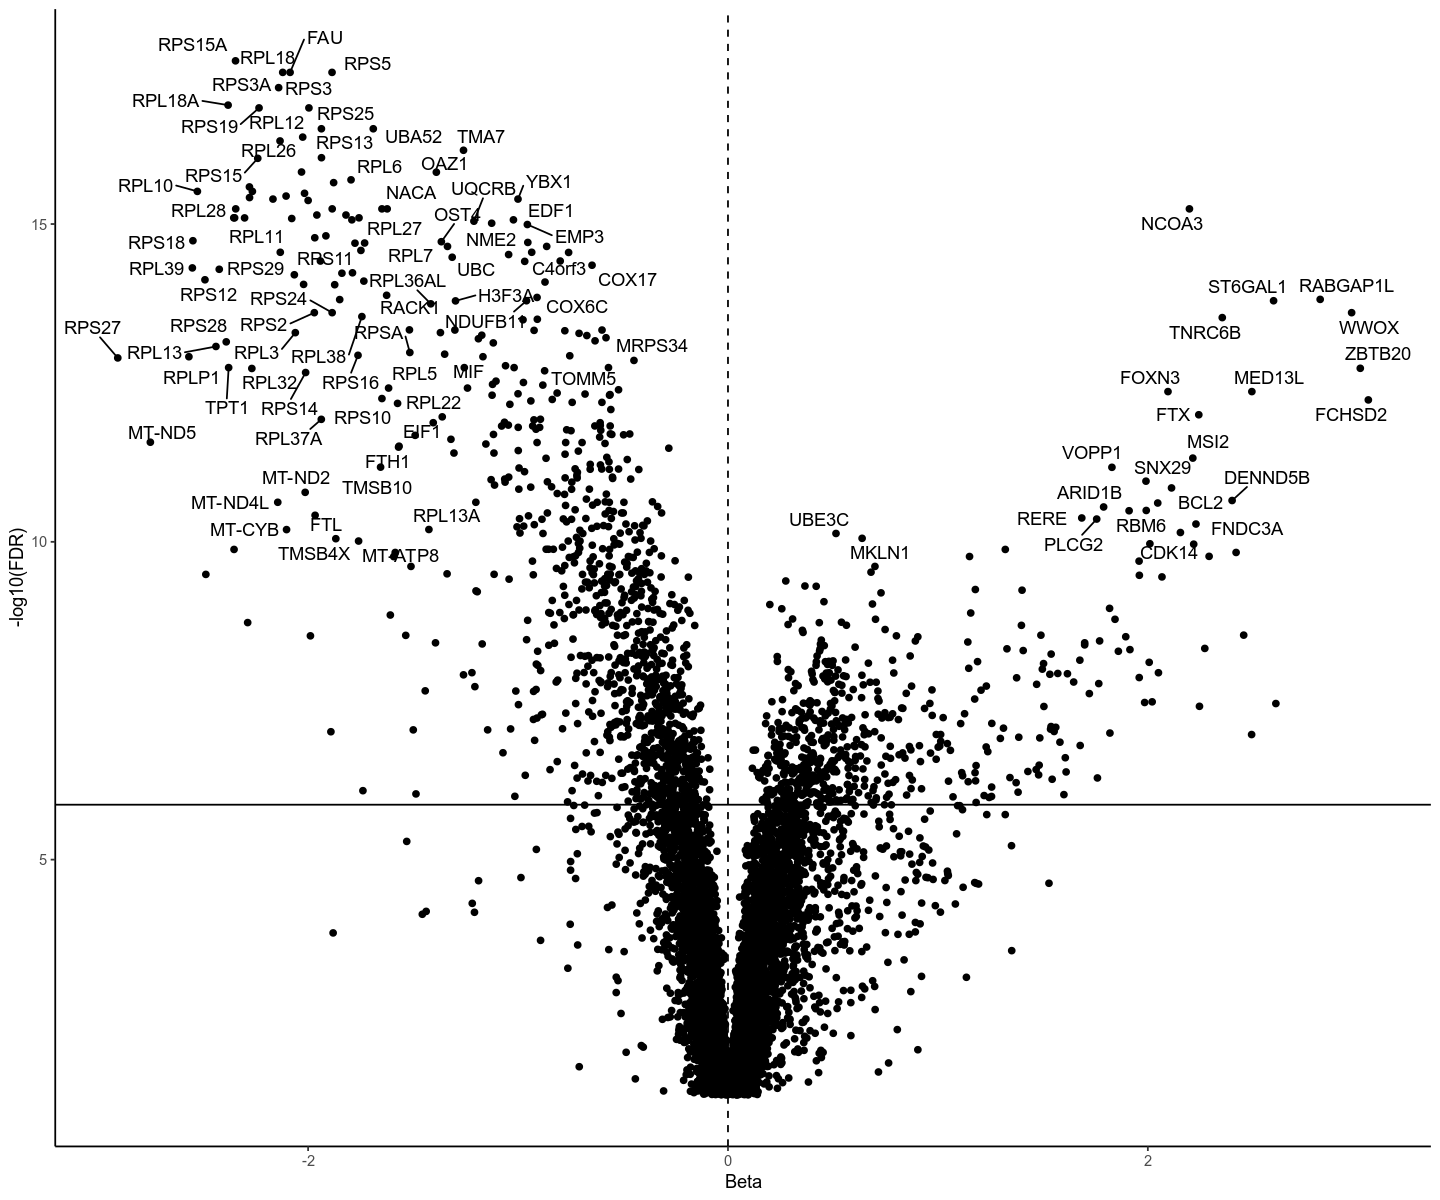

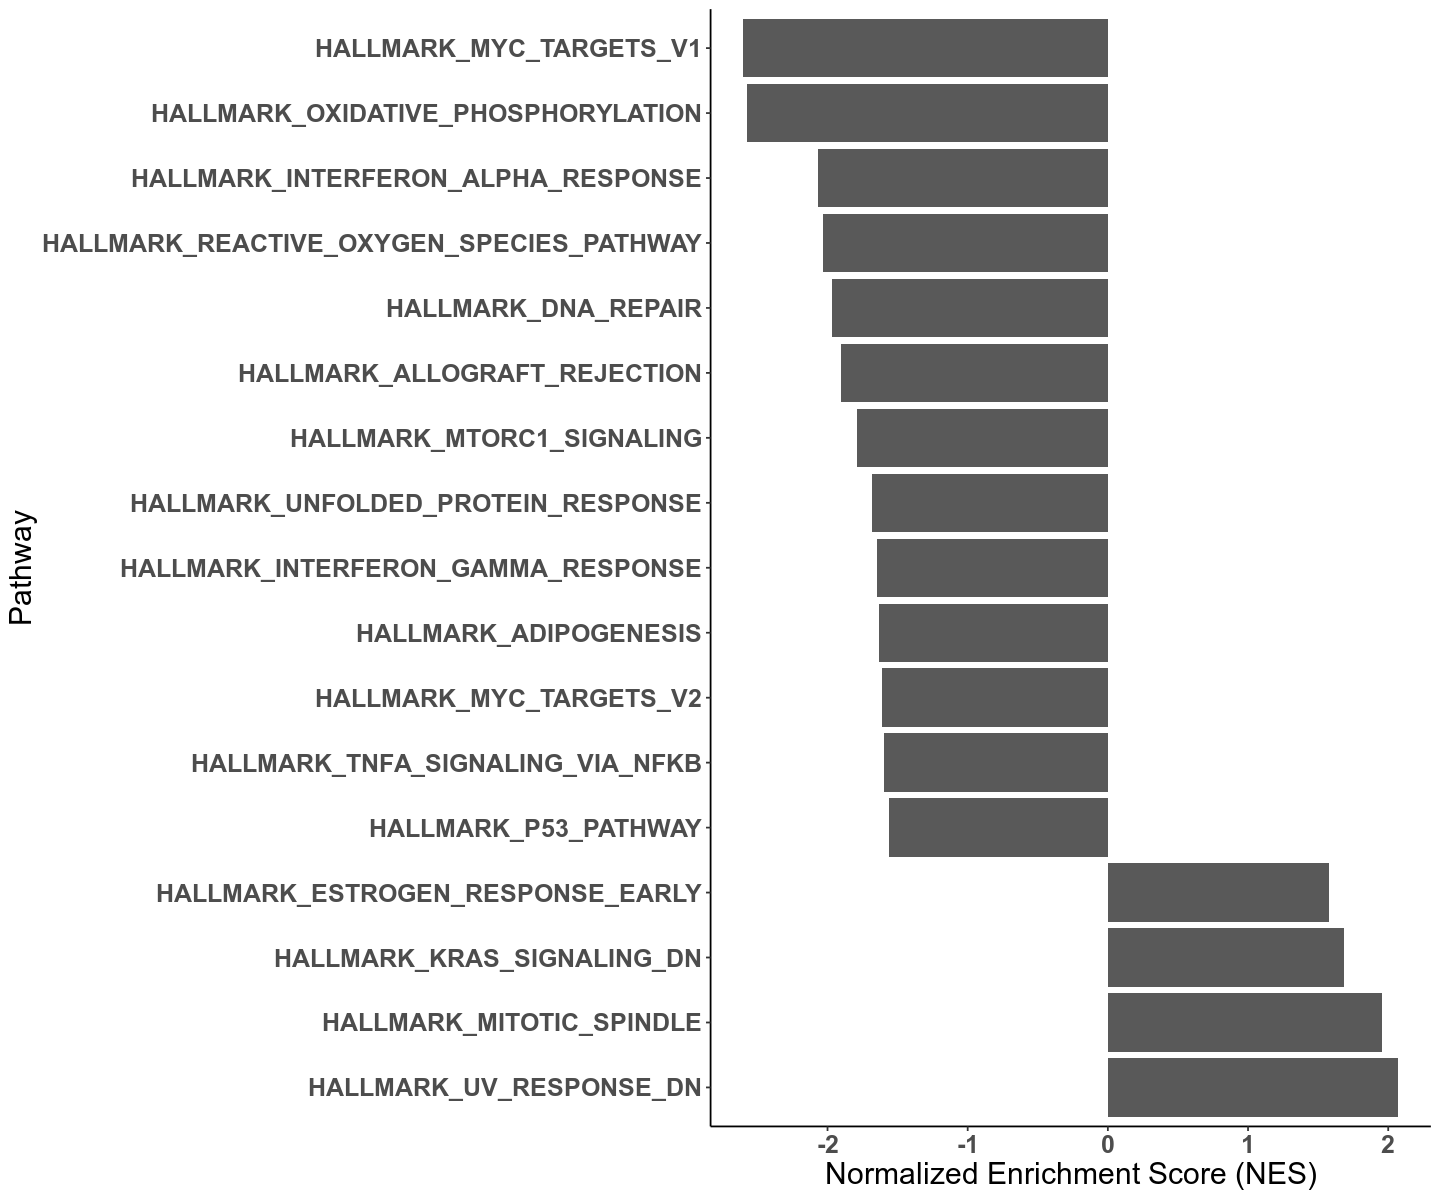

In [16]:
fig.size(10,12)

ggplot(out_filter %>% 
           mutate(label = ifelse(-log10(FDR) > 10, gene, NA)), aes(x = Beta, y = -log10(FDR))) + 
    geom_point() + 
    geom_vline(aes(xintercept = 0), linetype = "dashed") + 
    geom_hline(aes(yintercept = -log10(0.05/36601))) + 
    theme_classic() + 
    ggrepel::geom_text_repel(aes(label = label))


ggplot(gsea.H %>% filter(padj < 0.05), aes(x = NES, y = pathway)) +
    geom_bar(stat = "identity") +
    theme_classic() + 
    scale_y_discrete(limits = gsea.H %>% filter(padj < 0.05) %>% arrange(desc(NES)) %>% pull(pathway)) + 
    theme(legend.position = "none",
          axis.text = element_text(size = 15, face = "bold"),
          axis.title = element_text(size = 18)) +
    labs(x = 'Normalized Enrichment Score (NES)', y = 'Pathway')

### GSEA

In [ ]:
ind_list <- qcd_meta %>% mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% filter(Type == "LN") %>% 
                mutate(individual = unlist(individual)[3])  %>%
                select(dataset, individual) %>%
                table() %>% data.frame() %>% pivot_wider(names_from = "dataset", values_from = "Freq") %>% 
                filter(scRNAseq > 0 & snRNAseq > 0) %>% pull(individual)

ind_meta <- qcd_meta %>% mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% filter(Type == "LN") %>% 
                mutate(individual = unlist(individual)[3]) %>% 
                filter(individual %in% ind_list)

ind_norm <- qcd_norm[, ind_meta$cell]

In [ ]:
wilcox <- wilcoxauc(ind_norm, ind_meta$dataset)

In [ ]:
wilcox <- wilcox %>% filter(group == "scRNAseq")

In [ ]:
library(msigdbr)
library(fgsea)

##format for gsea 
FC.vec <- wilcox$logFC
names(FC.vec) <- wilcox$feature

scoreType <- "std"

H <- msigdbr(species = "Homo sapiens", category = "H")

H.ensembl.ls <- H %>% 
  select(gs_name, gene_symbol) %>% 
  group_by(gs_name) %>% 
  summarise(all.genes = list(unique(gene_symbol))) %>% 
  tibble::deframe()

#Run GSEA
gsea.H <- fgseaSimple(pathways = H.ensembl.ls,
                      stats = FC.vec,
                      scoreType = scoreType,
                      nperm=10000)

In [ ]:
fig.size(10,12)
ggplot(gsea.H %>% filter(padj < 0.05), aes(x = NES, y = pathway)) +
    geom_bar(stat = "identity") +
    scale_y_discrete(limits = gsea.H %>% filter(padj < 0.05) %>% arrange(desc(NES)) %>% pull(pathway)) + 
    theme_classic() + 
    theme(legend.position = "none",
          axis.text = element_text(size = 15, face = "bold"),
          axis.title = element_text(size = 18)) +
    labs(x = 'Normalized Enrichment Score (NES)', y = 'Pathway')